In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.isnull().sum()   # No null values

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
feature_names = data.columns

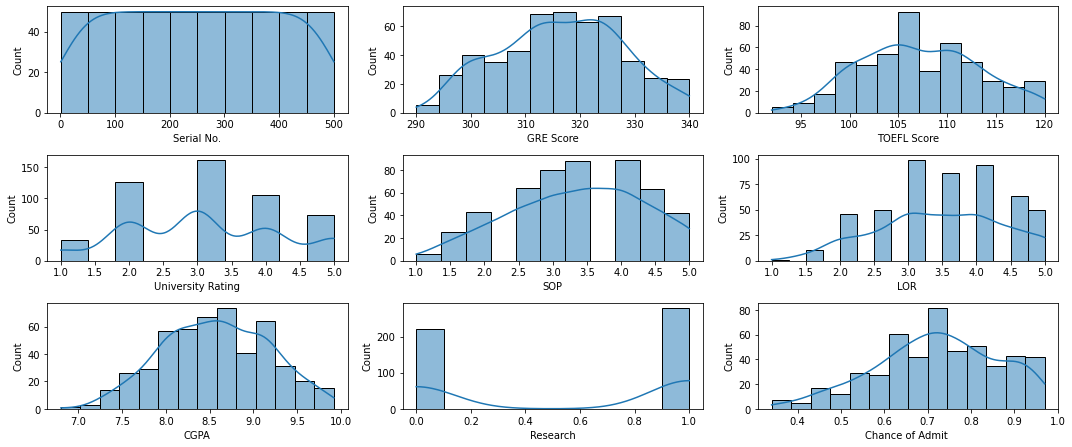

In [8]:
plt.figure(figsize=(15,10))

for i in range(1, len(feature_names)+1):
    plt.subplot(5,3, i)
    sns.histplot(data=data, x=feature_names[i-1], kde=True)
    plt.tight_layout()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [13]:
X = data.drop(labels=['Chance of Admit '], axis=1)
y = data['Chance of Admit ']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [15]:
std_scalar = StandardScaler()

In [16]:
X_train_scaled = std_scalar.fit_transform(X_train)

In [19]:
# Creating the model
svr = SVR(C=1.0, kernel='rbf', gamma='scale', degree=3, epsilon=0.1)

In [20]:
svr.fit(X_train_scaled, y_train)

SVR()

In [21]:
X_test_scaled = std_scalar.transform(X_test)

In [22]:
predictions = svr.predict(X_test_scaled)

In [25]:
from sklearn.metrics import r2_score

In [27]:
r2= r2_score(y_test, predictions)
r2

0.7632199437959383

In [28]:
adj_r2 = 1 - ((1-r2)*(X_train.shape[0] - 1)) / (X_train.shape[0] - X_train.shape[1] - 1)
adj_r2

0.7574093902694582